In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_classif

In [3]:
import tcr_emb_code
import data_processing

In [35]:
data = pd.read_csv('/home/yuliajk/projects/tcr_emb/data_scripts/prototypes_olga.txt', sep='\t')
data

,cdr3nt,cdr3aa,v,j,d,count,DStart,DEnd,VEnd,JStart,freq,reads,umis,length,subset
0,TGTGCCAGCAGCAGTGTCAGCAGGGCCCACACTGAAGCTTTCTTT,CASSSVSRAHTEAFF,TRBV7-9,TRBJ1-1,.,1,-1,-1,-1,-1,-1,1,1,45,.
1,TGTGCCACCAGTGATCAGCACAGATTCTCCTACGAGCAGTACTTC,CATSDQHRFSYEQYF,TRBV24-1,TRBJ2-7,.,1,-1,-1,-1,-1,-1,1,1,45,.
2,TGTGCCAGCAGCCAAACTCCGAAGTCCCCAGAGGAGGGCAATCAGC...,CASSQTPKSPEEGNQPQHF,TRBV7-3,TRBJ1-5,.,1,-1,-1,-1,-1,-1,1,1,57,.
3,TGCGCCAGCAGCCAAGATCGAGTGGAGGGGACAGTAATGAACACTG...,CASSQDRVEGTVMNTEAFF,TRBV4-1,TRBJ1-1,.,1,-1,-1,-1,-1,-1,1,1,57,.
4,TGCGCCAGCAGCCAAGATCCGGATCGGACAGTTGTATACCTTGAAA...,CASSQDPDRTVVYLEKLFF,TRBV4-1,TRBJ1-4,.,1,-1,-1,-1,-1,-1,1,1,57,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,TGTGCCAGCAGCCCGCGGGGGGGCCTTCCCCGGAAGTACGAGCAGT...,CASSPRGGLPRKYEQYF,TRBV28,TRBJ2-7,.,1,-1,-1,-1,-1,-1,1,1,51,.
2996,TGCAGTGCTGCCCCCGGGGGGCCTGTTGACTTCTATGAGCAGTTCTTC,CSAAPGGPVDFYEQFF,TRBV20-1,TRBJ2-1,.,1,-1,-1,-1,-1,-1,1,1,48,.
2997,TGCAGTGCTGTCCTATCGTCCGACTTC,CSAVLSSDF,TRBV20-1,TRBJ2-7,.,1,-1,-1,-1,-1,-1,1,1,27,.
2998,TGTGCCAGCAGCGCAATTCAAAGTACGCAGTATTTT,CASSAIQSTQYF,TRBV7-3,TRBJ2-3,.,1,-1,-1,-1,-1,-1,1,1,36,.


In [36]:
prototypes_path = '/home/yuliajk/projects/tcr_emb/data_scripts/prototypes_olga.txt'
chain = 'TRB'
file_path_prefix = 'prots_olga'
file_date = '140723'

In [37]:
tcr_emb_code.mir_clac(data, file_path_prefix, file_date, chain, prototypes_path)

In [38]:
data_dists_raw_path = 'data_scripts/' + file_path_prefix + file_date + '.dist.txt'
data_dists_raw = pd.read_csv(data_dists_raw_path, sep = '\t')
data_c_b_dist = tcr_emb_code.mir_dists_format(data_dists_raw, data,'cdr3aa')
data_c_b_dist

,cdr3_1,cdr3_10,cdr3_100,cdr3_1000,cdr3_1001,cdr3_1002,cdr3_1003,cdr3_1004,cdr3_1005,cdr3_1006,...,j_990,j_991,j_992,j_993,j_994,j_995,j_996,j_997,j_998,j_999
cdr3aa,,,,,,,,,,,,,,,,,,,,,
CASSSVSRAHTEAFF,76.0,22.0,16.0,14.0,12.0,31.0,10.0,24.0,25.0,15.0,...,51.0,51.0,44.0,47.0,51.0,47.0,44.0,38.0,38.0,51.0
CATSDQHRFSYEQYF,28.0,16.0,26.0,32.0,41.0,15.0,17.0,35.0,19.0,12.0,...,62.0,42.0,60.0,81.0,62.0,81.0,60.0,54.0,54.0,62.0
CASSQTPKSPEEGNQPQHF,17.0,19.0,13.0,7.0,8.0,12.0,12.0,14.0,21.0,15.0,...,44.0,38.0,49.0,42.0,44.0,42.0,49.0,44.0,44.0,44.0
CASSQDRVEGTVMNTEAFF,29.0,21.0,11.0,10.0,11.0,26.0,5.0,14.0,26.0,13.0,...,51.0,51.0,44.0,47.0,51.0,47.0,44.0,38.0,38.0,51.0
CASSQDPDRTVVYLEKLFF,11.0,11.0,6.0,9.0,11.0,6.0,15.0,13.0,10.0,10.0,...,44.0,44.0,39.0,35.0,44.0,35.0,39.0,38.0,38.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CASSPRGGLPRKYEQYF,18.0,27.0,25.0,34.0,25.0,13.0,14.0,47.0,29.0,22.0,...,62.0,42.0,60.0,81.0,62.0,81.0,60.0,54.0,54.0,62.0
CSAAPGGPVDFYEQFF,9.0,5.0,16.0,24.0,25.0,13.0,6.0,39.0,12.0,33.0,...,85.0,49.0,62.0,62.0,85.0,62.0,62.0,54.0,54.0,85.0
CSAVLSSDF,-1.0,-5.0,2.0,-2.0,6.0,-2.0,2.0,-1.0,-7.0,2.0,...,62.0,42.0,60.0,81.0,62.0,81.0,60.0,54.0,54.0,62.0


In [39]:
pc_n = 3000
pca_df, pca_model = data_processing.pca(data_c_b_dist,pc_n)
pca_df_data = pca_df.copy()
pca_df_data['cdr3']=data_c_b_dist.index
#pca_df_data['antigen.epitope']=data['antigen.epitope']
pca_df_data['j.segm']=data['j']
pca_df_data['v.segm']=data['v']
#pca_df_data=pca_df_data.merge(data[['cdr3','antigen.epitope','j.segm','v.segm']], on='cdr3')
#pca_df_data= pca_df_data.groupby(['cdr3']).first().reset_index()
#pca_df_data['categorical_label'] = data_processing.cat_lable(pca_df_data['antigen.epitope'])
pca_df_data.shape


(3000, 3003)

In [40]:
pca_df_data

,0,1,2,3,4,5,6,7,8,9,...,2993,2994,2995,2996,2997,2998,2999,cdr3,j.segm,v.segm
0,6.455752,-45.471074,-53.459651,-7.824087,8.821104,-17.677426,-24.437921,-5.642337,-7.646220,24.635843,...,-0.000358,0.001773,0.001647,-0.001837,0.000635,-0.000222,1.835503e-14,CASSSVSRAHTEAFF,TRBJ1-1,TRBV7-9
1,-39.626362,48.366281,0.150324,2.872315,-22.635428,-14.593349,-3.251103,-3.766045,-15.442109,-7.567187,...,0.002648,0.002802,-0.001625,-0.001723,-0.001181,0.000903,1.835503e-14,CATSDQHRFSYEQYF,TRBJ2-7,TRBV24-1
2,12.594915,-49.021950,56.675912,-33.382942,20.384463,-21.790946,-27.963747,-5.343185,3.455546,-1.972750,...,0.000094,-0.001735,-0.001210,0.001059,-0.000273,-0.000603,1.835503e-14,CASSQTPKSPEEGNQPQHF,TRBJ1-5,TRBV7-3
3,19.510317,-14.575452,-50.473702,4.492621,25.797748,-16.909139,25.341081,-26.878118,22.427208,25.893366,...,0.003108,-0.000598,0.000005,-0.000060,0.001307,-0.002275,1.835503e-14,CASSQDRVEGTVMNTEAFF,TRBJ1-1,TRBV4-1
4,47.517161,-17.630127,-9.543509,-5.477948,32.598439,7.610767,23.695571,2.012843,35.893879,5.358155,...,-0.000026,0.001950,-0.000269,-0.001211,0.000510,-0.000542,1.835503e-14,CASSQDPDRTVVYLEKLFF,TRBJ1-4,TRBV4-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-49.064676,47.504938,-2.513280,-2.114425,-18.572327,-10.136755,7.732527,-20.939506,-6.378703,-9.152537,...,-0.000010,0.000657,-0.000657,-0.000284,-0.000182,0.000452,1.835503e-14,CASSPRGGLPRKYEQYF,TRBJ2-7,TRBV28
2996,-15.963395,16.466953,4.238837,80.286610,37.800967,-11.740911,0.444264,4.267738,17.917438,-11.476511,...,-0.001521,-0.000387,-0.000851,-0.001179,0.001883,0.001083,1.835503e-14,CSAAPGGPVDFYEQFF,TRBJ2-1,TRBV20-1
2997,32.836714,20.121588,36.154416,109.032148,16.322917,-14.769408,-4.374909,32.450424,-22.159462,-8.683281,...,-0.000756,0.000492,-0.001635,-0.000626,0.001600,0.000982,1.835503e-14,CSAVLSSDF,TRBJ2-7,TRBV20-1
2998,-41.545784,-37.592781,20.133410,6.593196,-4.325196,17.829565,-28.715289,13.281450,-2.263494,15.864303,...,-0.004518,0.000600,0.000538,-0.000795,0.000103,0.000333,1.835503e-14,CASSAIQSTQYF,TRBJ2-3,TRBV7-3


/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x576 with 0 Axes>

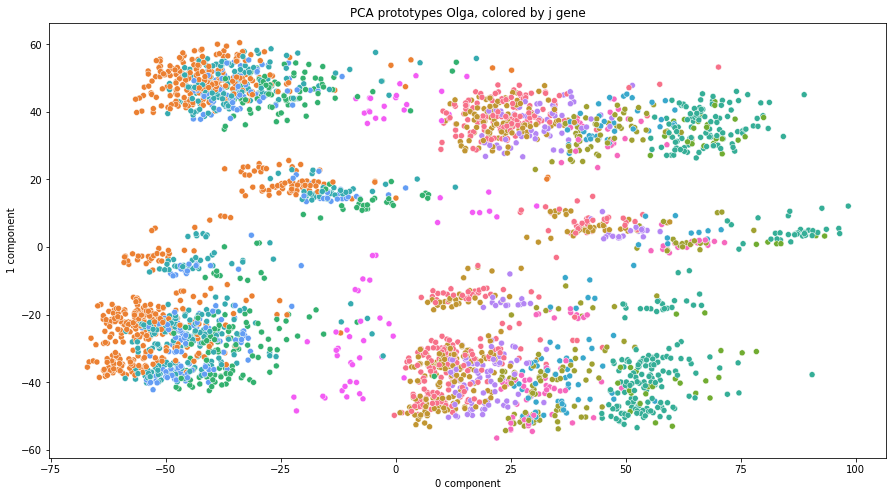

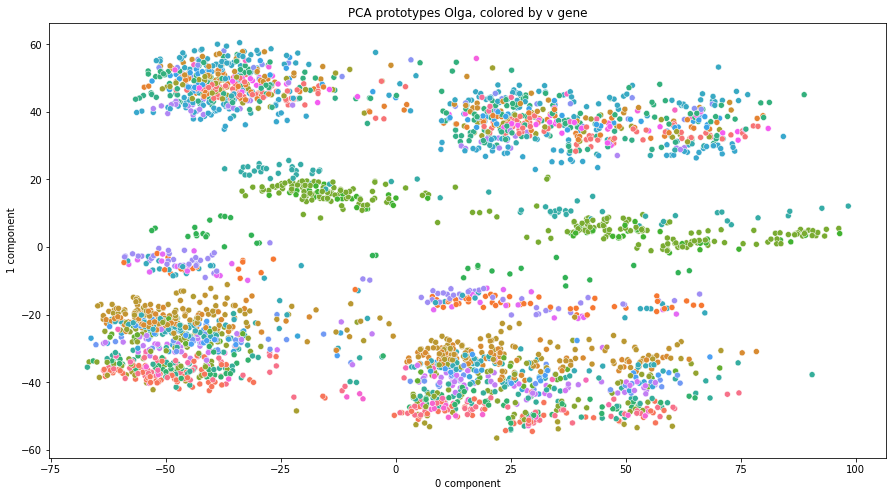

<Figure size 1080x576 with 0 Axes>

In [41]:
pc1 = 0
pc2 = 1
plt.figure(figsize=(15,8))
ax = sns.scatterplot(pc1, pc2, data=pca_df_data, hue='j.segm', legend = False)
ax.set_title("PCA prototypes Olga, colored by j gene")
ax.set_xlabel(str(pc1)+" component")
ax.set_ylabel(str(pc2)+" component")
plt.figure(figsize=(15,8))
ax = sns.scatterplot(pc1, pc2, data=pca_df_data, hue='v.segm',legend = False)
ax.set_title("PCA prototypes Olga, colored by v gene")
ax.set_xlabel(str(pc1)+" component")
ax.set_ylabel(str(pc2)+" component")
plt.figure(figsize=(15,8))


In [42]:
X_embedded = data_processing.tsne(pca_df,2,10,20)
tsne_df = pd.DataFrame(data = X_embedded, columns = ['DM1', 'DM2'])


tsne_df_data = tsne_df.copy()
tsne_df_data['cdr3']=data_c_b_dist.index
#tsne_df_data['antigen.epitope'] = data['antigen.epitope']
tsne_df_data['j.segm'] = data['j']
tsne_df_data['v.segm'] = data['v']
#tsne_df_data=tsne_df_data.merge(data[['cdr3','antigen.epitope','j.segm','v.segm']], on='cdr3')
#tsne_df_data= tsne_df_data.groupby(['cdr3']).first().reset_index()
#tsne_df_data['categorical_label'] = data_processing.cat_lable(tsne_df_data['antigen.epitope'])
#tsne_df_data['cdr3_in_epitope_count'] = tsne_df_data.groupby('antigen.epitope')['cdr3'].transform("size")
#tsne_df_data['epitope_type'] = tsne_df_data['cdr3_in_epitope_count'].apply(lambda x: 'other' if x < 300 else 'class') 

tsne_df_data

,DM1,DM2,cdr3,j.segm,v.segm
0,-7.986180,-57.166908,CASSSVSRAHTEAFF,TRBJ1-1,TRBV7-9
1,-52.638828,50.558411,CATSDQHRFSYEQYF,TRBJ2-7,TRBV24-1
2,7.725008,-87.973831,CASSQTPKSPEEGNQPQHF,TRBJ1-5,TRBV7-3
3,24.098436,-3.807778,CASSQDRVEGTVMNTEAFF,TRBJ1-1,TRBV4-1
4,43.258835,-49.630585,CASSQDPDRTVVYLEKLFF,TRBJ1-4,TRBV4-1
...,...,...,...,...,...
2995,-71.610764,47.502823,CASSPRGGLPRKYEQYF,TRBJ2-7,TRBV28
2996,-10.232310,13.798166,CSAAPGGPVDFYEQFF,TRBJ2-1,TRBV20-1
2997,-18.640350,9.482761,CSAVLSSDF,TRBJ2-7,TRBV20-1
2998,-39.158813,-71.978561,CASSAIQSTQYF,TRBJ2-3,TRBV7-3


/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TSNE of prototypes Olga after PCA, colored by v segment')

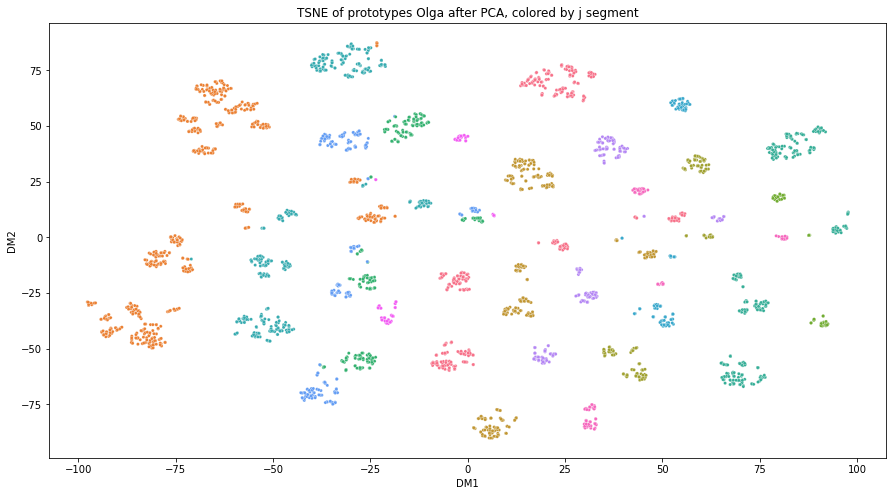

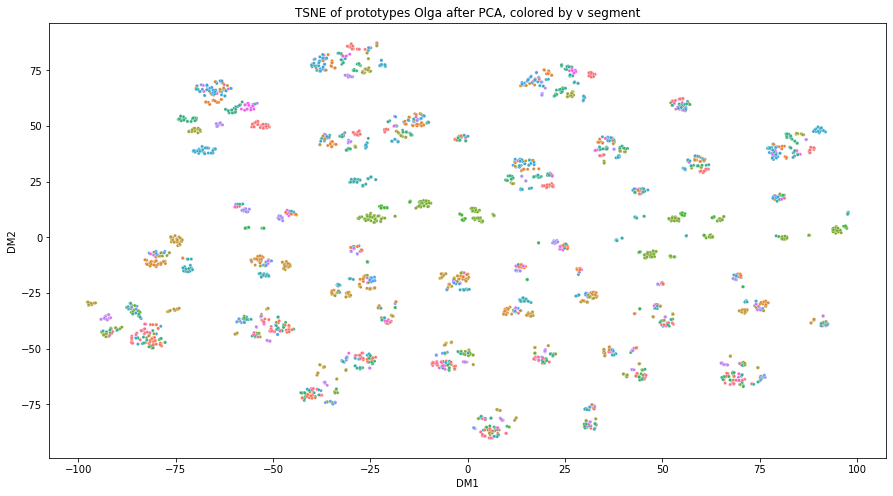

In [43]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data, hue='j.segm',s=10,legend = False)
ax.set_title("TSNE of prototypes Olga after PCA, colored by j segment")

plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data, hue='v.segm',s=10,legend = False)
ax.set_title("TSNE of prototypes Olga after PCA, colored by v segment")


In [44]:
data = pd.read_csv('data_scripts/prototypes_trb_aa.txt', sep='\t')
data

,count,freq,cdr3nt,cdr3aa,v,d,j,VEnd,DStart,DEnd,JStart,incidence,convergence,occurrences
0,1,1.128725e-08,TGTGCCTGGAGTGTACTTGGACCACAGGGTCGGGAGACCCAGTACTTC,CAWSVLGPQGRETQYF,TRBV30,TRBD1,TRBJ2-5,13,23,28,33,1,1,1
1,1,1.128725e-08,TGTGCCAGCAGCCACGAGTCGGGCCAAAACGTCCTGACTTTC,CASSHESGQNVLTF,TRBV3-1,TRBD1,TRBJ2-6,13,20,23,27,1,1,1
2,2,2.257450e-08,TGCAGCCCCCGTCGGGACGGAGGAGCCCCTTGTCAGCTGTTTTTT,CSPRRDGGAPCQLFF,TRBV29-1,TRBD1,TRBJ2-2,5,13,17,34,1,1,1
3,1,1.128725e-08,TGTGCCAGCAGTTTAGCGCTGGGCAGGGTGATGGGGGGCTACACCTTC,CASSLALGRVMGGYTF,TRBV12-4,TRBD1,TRBJ1-2,16,23,27,36,1,1,1
4,3,3.386175e-08,TGTGCCAGCAGTCCCCTCCGCACTAGCGGGGGTACTGATACGCAGT...,CASSPLRTSGGTDTQYF,TRBV12-4,TRBD2,TRBJ2-3,11,21,31,36,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3,3.386175e-08,TGCGCCAGCAGCTTGGCCCCGGGACAGTTCTTCTACAATGAGCAGT...,CASSLAPGQFFYNEQFF,TRBV5-1,TRBD1,TRBJ2-1,15,20,26,32,1,1,1
2996,3,3.386175e-08,TGTGCCAGCAGGATAGGGACAGTGAACGAGCAGTACTTC,CASRIGTVNEQYF,TRBV6-1,TRBD1,TRBJ2-7,10,15,21,25,1,2,2
2997,1,1.128725e-08,TGTGCCAGCAGCCGATCCGGTTTTGGGGCCGGGGAGACCCAGTACTTC,CASSRSGFGAGETQYF,TRBV7-6,TRBD1,TRBJ2-5,11,24,28,33,1,1,1
2998,2,2.257450e-08,TGCGCCAGCAGGGTCTCCCTAGGCCCCTACGAGCAGTACTTC,CASRVSLGPYEQYF,TRBV4-1,TRBD2,TRBJ2-7,10,14,18,25,1,1,1


In [45]:
prototypes_path = 'data_scripts/prototypes_trb_aa.txt'
chain = 'TRB'
file_path_prefix = 'prots_trb'
file_date = '140723'

In [46]:
tcr_emb_code.mir_clac(data, file_path_prefix, file_date, chain, prototypes_path)

In [47]:
data_dists_raw_path = 'data_scripts/' + file_path_prefix + file_date + '.dist.txt'
data_dists_raw = pd.read_csv(data_dists_raw_path, sep = '\t')
data_c_b_dist = tcr_emb_code.mir_dists_format(data_dists_raw, data,'cdr3aa')
data_c_b_dist

,cdr3_1,cdr3_10,cdr3_100,cdr3_1000,cdr3_1001,cdr3_1002,cdr3_1003,cdr3_1004,cdr3_1005,cdr3_1006,...,j_990,j_991,j_992,j_993,j_994,j_995,j_996,j_997,j_998,j_999
cdr3aa,,,,,,,,,,,,,,,,,,,,,
CAWSVLGPQGRETQYF,93.0,9.0,17.0,14.0,20.0,24.0,7.0,37.0,31.0,-3.0,...,54.0,35.0,54.0,54.0,54.0,54.0,35.0,35.0,54.0,54.0
CASSHESGQNVLTF,9.0,47.0,9.0,0.0,13.0,15.0,9.0,9.0,11.0,-1.0,...,36.0,44.0,36.0,36.0,40.0,40.0,37.0,44.0,36.0,36.0
CSPRRDGGAPCQLFF,0.0,5.0,7.0,10.0,5.0,11.0,19.0,3.0,14.0,6.0,...,42.0,38.0,42.0,42.0,49.0,49.0,40.0,38.0,42.0,42.0
CASSLALGRVMGGYTF,5.0,17.0,8.0,-5.0,-4.0,18.0,0.0,20.0,18.0,-6.0,...,43.0,80.0,43.0,43.0,41.0,41.0,42.0,80.0,43.0,43.0
CASSPLRTSGGTDTQYF,33.0,16.0,22.0,18.0,15.0,22.0,8.0,38.0,40.0,-2.0,...,60.0,41.0,60.0,60.0,62.0,62.0,41.0,41.0,60.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CASSLAPGQFFYNEQFF,14.0,10.0,23.0,19.0,13.0,36.0,27.0,33.0,21.0,4.0,...,62.0,41.0,62.0,62.0,85.0,85.0,45.0,41.0,62.0,62.0
CASRIGTVNEQYF,16.0,12.0,18.0,18.0,19.0,27.0,24.0,22.0,18.0,3.0,...,81.0,43.0,81.0,81.0,62.0,62.0,46.0,43.0,81.0,81.0
CASSRSGFGAGETQYF,35.0,20.0,26.0,13.0,19.0,20.0,12.0,42.0,56.0,0.0,...,54.0,35.0,54.0,54.0,54.0,54.0,35.0,35.0,54.0,54.0


In [48]:
pc_n = 3000
pca_df, pca_model = data_processing.pca(data_c_b_dist,pc_n)
pca_df_data = pca_df.copy()
pca_df_data['cdr3']=data_c_b_dist.index
#pca_df_data['antigen.epitope']=data['antigen.epitope']
pca_df_data['j.segm']=data['j']
pca_df_data['v.segm']=data['v']
#pca_df_data=pca_df_data.merge(data[['cdr3','antigen.epitope','j.segm','v.segm']], on='cdr3')
#pca_df_data= pca_df_data.groupby(['cdr3']).first().reset_index()
#pca_df_data['categorical_label'] = data_processing.cat_lable(pca_df_data['antigen.epitope'])
pca_df_data.shape


(3000, 3003)

/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x576 with 0 Axes>

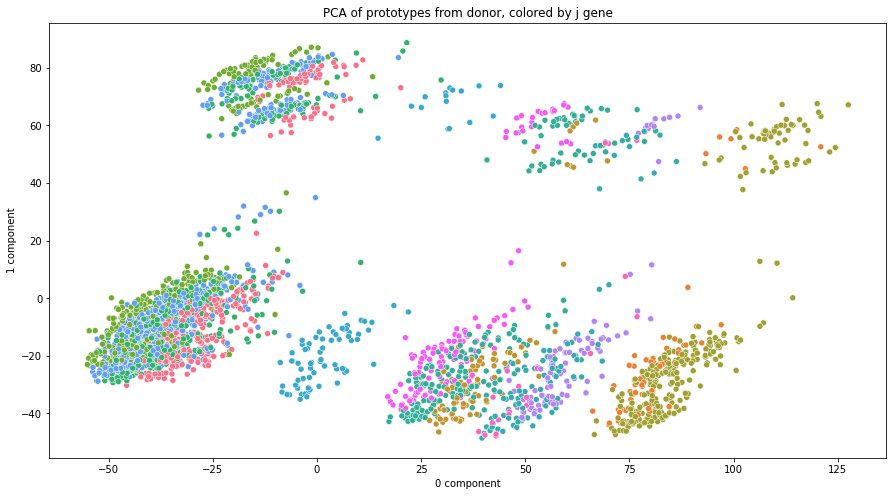

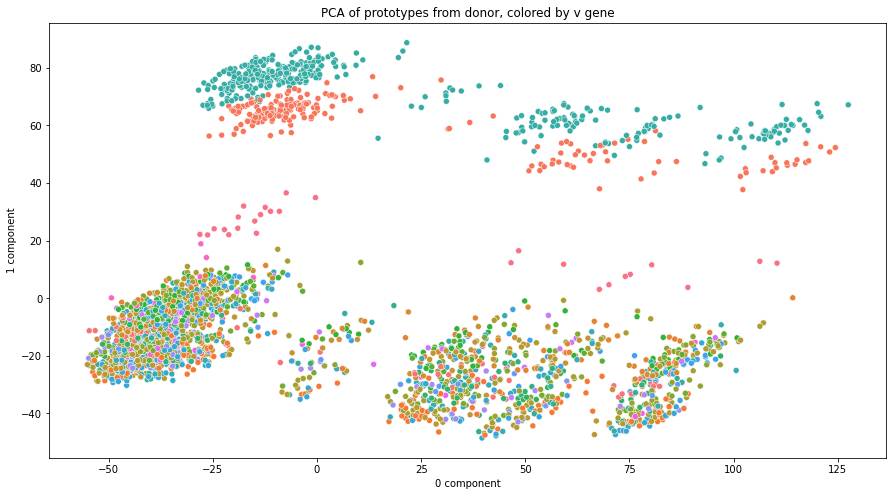

<Figure size 1080x576 with 0 Axes>

In [49]:
pc1 = 0
pc2 = 1
plt.figure(figsize=(15,8))
ax = sns.scatterplot(pc1, pc2, data=pca_df_data, hue='j.segm', legend = False)
ax.set_title("PCA of prototypes from donor, colored by j gene")
ax.set_xlabel(str(pc1)+" component")
ax.set_ylabel(str(pc2)+" component")
plt.figure(figsize=(15,8))
ax = sns.scatterplot(pc1, pc2, data=pca_df_data, hue='v.segm',legend = False)
ax.set_title("PCA of prototypes from donor, colored by v gene")
ax.set_xlabel(str(pc1)+" component")
ax.set_ylabel(str(pc2)+" component")
plt.figure(figsize=(15,8))


In [50]:
X_embedded = data_processing.tsne(pca_df,2,10,20)
tsne_df = pd.DataFrame(data = X_embedded, columns = ['DM1', 'DM2'])


tsne_df_data = tsne_df.copy()
tsne_df_data['cdr3']=data_c_b_dist.index
#tsne_df_data['antigen.epitope'] = data['antigen.epitope']
tsne_df_data['j.segm'] = data['j']
tsne_df_data['v.segm'] = data['v']
#tsne_df_data=tsne_df_data.merge(data[['cdr3','antigen.epitope','j.segm','v.segm']], on='cdr3')
#tsne_df_data= tsne_df_data.groupby(['cdr3']).first().reset_index()
#tsne_df_data['categorical_label'] = data_processing.cat_lable(tsne_df_data['antigen.epitope'])
#tsne_df_data['cdr3_in_epitope_count'] = tsne_df_data.groupby('antigen.epitope')['cdr3'].transform("size")
#tsne_df_data['epitope_type'] = tsne_df_data['cdr3_in_epitope_count'].apply(lambda x: 'other' if x < 300 else 'class') 

tsne_df_data

,DM1,DM2,cdr3,j.segm,v.segm
0,-5.283663,25.942089,CAWSVLGPQGRETQYF,TRBJ2-5,TRBV30
1,76.048752,-24.254431,CASSHESGQNVLTF,TRBJ2-6,TRBV3-1
2,66.847412,50.604042,CSPRRDGGAPCQLFF,TRBJ2-2,TRBV29-1
3,98.763359,-45.762409,CASSLALGRVMGGYTF,TRBJ1-2,TRBV12-4
4,-84.282982,-8.912382,CASSPLRTSGGTDTQYF,TRBJ2-3,TRBV12-4
...,...,...,...,...,...
2995,-52.442505,-78.733627,CASSLAPGQFFYNEQFF,TRBJ2-1,TRBV5-1
2996,-27.173187,25.852467,CASRIGTVNEQYF,TRBJ2-7,TRBV6-1
2997,-9.120987,-33.766502,CASSRSGFGAGETQYF,TRBJ2-5,TRBV7-6
2998,-57.347565,1.276922,CASRVSLGPYEQYF,TRBJ2-7,TRBV4-1


/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TSNE of prototypes from donor after PCA, colored by v segment')

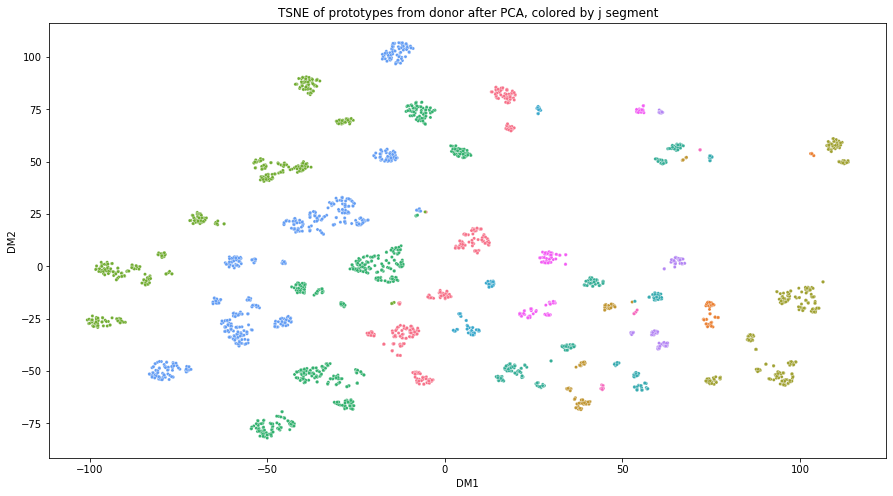

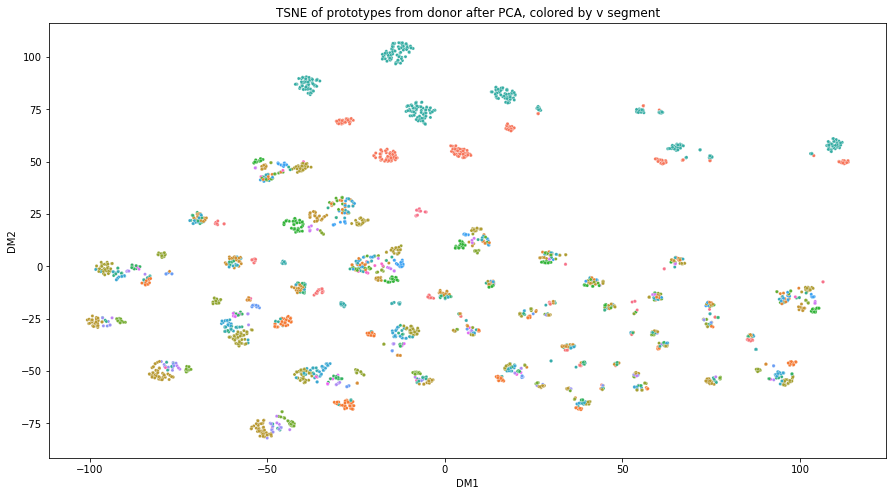

In [51]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data, hue='j.segm',s=10,legend = False)
ax.set_title("TSNE of prototypes from donor after PCA, colored by j segment")

plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data, hue='v.segm',s=10,legend = False)
ax.set_title("TSNE of prototypes from donor after PCA, colored by v segment")
